# AM2061 Algorithm 5-1
## Numerical Integration - Composite Simpsons Rule

The Composite Simpsons Rule is an Algoritm used to Numerically Integrate across a set of data-points, used if the function is unknown. This combines the previously seen Lagrange Interpolating Polynomials with some Integration tricks to find an approximation of the area under a set of data-points.

Following the procedure in **Lecture 17**, we can show that an approximate a function $f \left( x \right)$ when integrated is given by:

$$ \int_a^b f(x) \, dx = \int_a^b \sum_{i=0}^{n} f(x_i) L_{i}(x) \, dx + \int_a^b \prod_{i=0}^{n} (x - x_i) \frac{f^{(n+1)}(\varepsilon)}{(n + 1)!} \, dx$$

Where we have the second term as our error in approximation, let us assume this is small and ignore it. Let us also assume that all $f(x_i)$ do not depend on $x$ such that we get:

$$ \int_a^b f(x) \, dx \approx \sum_{i=0}^{n} f(x_i) \int_a^b L_{i}(x) \, dx $$

With $L_{i}(x)$ denotes the Lagrange Interpolation Polynomials. For the Simpsons rule, we choose quadratic polynomials. As in **Lecture 18**, we let the Lagrange Interpolating Polynomials component equal $a_i$, along with $a = x_0$ and $b = x_n$, such that:

$$ \int_a^b f(x) \, dx \approx \sum_{i=0}^{n} a_i f(x_i) $$
$$ a_i = \int_{x_0}^{x_n} L_{i}(x) \, dx = \int_{x_0}^{x_n} \prod_{j=0, j \neq i}^{n} \frac{(x - x_j)}{(x_i - x_j)} \, dx $$

The Composite part of this is the act of performing this integration in discrete steps across the data-range, allowing us to specify a width $h = \frac{b - a}{n}$. In the case of $n = 2$ *($n$ for order of polynomials, not number of steps)*, the Simpsons Rule, we get:

$$ \int_a^b f(x) \, dx \approx \frac{h}{3} \left[ f(x_0) + 2 \sum_{j=1}^{\frac{n}{2}-1} f(x_{2j}) + 4 \sum_{j=1}^{\frac{n}{2}} f(x_{2j-1}) + f(x_{n}) \right] $$

A brief explanation is as follows:

* Input a function $f$, to be numerically integrated
* We know the endpoints $a$ and $b$ (where $a < b$), along with the desired number of steps $n > 0$
* Find the width $h$
* Set $XI0$ (covers the first and last component in the square brackets), initialise guess $XI1$ and $XI2$ for the other two components
  * Update the values of $XI1$ and $XI2$ by performing the summations of increasing $x$
* Calculate the above equation and $XI$ equal to the final answer

The following is the pseudocode provided:
    
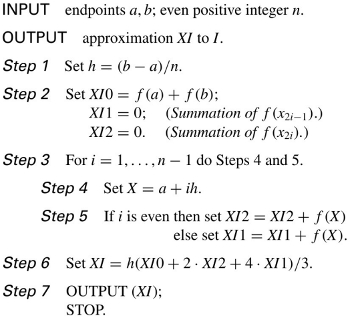

Let us now create this in Python.

First we must define a dataset to work with. I will use what was given in the **Lab 8**, the calculation:

$$ \int_0^\pi sin(x) \, dx $$

When solved analytically we have a value of $2$, let us approximate this:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: np.sin(x)
a = 0
b = np.pi
n = 20

Now let us define the algorithm, we need to pass in the function, endpoints, and number of steps.

Note that there are comments intended to help understanding, and be sure to refer to the pseudocode if stuck!

In [2]:
def SimpsonsRule(f, a, b, n):
    '''
    Usage:
        Takes a function and endpoints to be numerically integrated over
    Inputs:
        f: function to be numerically integrated
        a: start-point
        b: end-point
        n: number of steps
    Outputs:
        XI: Estimation for the Integral over the given range
    '''
    # Step 1
    h = (b - a) / n
    
    # Step 2
    XI0 = f(a) + f(b)
    XI1 = 0 # initial guess for summation of f(x_{2i - 1})
    XI2 = 0 # initial guess for summation of f(x_{2i})
    
    # Step 3
    for i in range(1, n):
        # Step 4
        x = a + i * h # move to next datapoint
        # Step 5
        if i % 2 == 0: # if even
            XI2 += f(x)
        else: # if odd
            XI1 += f(x)
            
    # Step 6
    XI = h * (XI0 + 2 * XI2 + 4 * XI1) / 3 # plug into formula
    
    return XI

We can now test this algorithm for a solution, which will be returned as a float:

In [3]:
SimpsonsRule(f, a, b, n)

2.0000067844418012

There are many reasons to approximate the area under a funciton. One simple application is to find the average value of a function:

$$ f_{avg} = \frac{1}{b-a} \int_a^b f(x) \, dx $$

Imagine that the velocity of a car is given by:

$$v(t) =110 \sin \left( \left( t+4 \right) \sin{t} \right) + \exp \left( -t + 4 \right) + 110 $$

Where velocity $v$ is in km/h and time $t$ is in hours. A plot of this velocity over a course of $3$ hours is as follows:

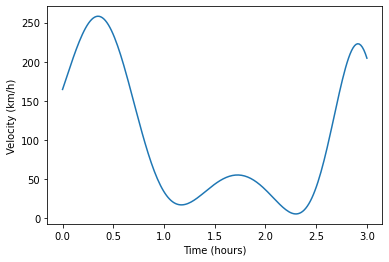

In [4]:
t = np.linspace(0, 3, 200)
f = lambda t: 110 * np.sin( (t + 4) * np.sin(t)) + np.exp(-t + 4) + 110

plt.plot(t, f(t))
plt.xlabel('Time (hours)')
plt.ylabel('Velocity (km/h)')
plt.show()

Let us find the average velocity over the course of the entire drive:

In [5]:
a = 0
b = 3
n = 20
SimpsonsRule(f, a, b, n) / (b - a)

101.45064142325565

The average velocity in the range $\left[ 0.5, 1.21 \right]$ is:

In [6]:
a = 0.5
b = 1.21
n = 20
SimpsonsRule(f, a, b, n) / (b - a)

96.98475825178384